## 1.导入数据

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,)) 
])

# 加载 Fashion MNIST 数据集
train_dataset = datasets.FashionMNIST(root='./data_FashionMNIST', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data_FashionMNIST', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

## 2.定义模型

In [5]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Linear(84, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

## 3.训练模型

In [6]:
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')

Epoch [1/10], Loss: 2.2943, Train Acc: 12.56%
Epoch [2/10], Loss: 2.2289, Train Acc: 28.52%
Epoch [3/10], Loss: 1.2935, Train Acc: 57.41%
Epoch [4/10], Loss: 0.7934, Train Acc: 70.08%
Epoch [5/10], Loss: 0.7085, Train Acc: 73.15%
Epoch [6/10], Loss: 0.6605, Train Acc: 74.87%
Epoch [7/10], Loss: 0.6288, Train Acc: 76.11%
Epoch [8/10], Loss: 0.6001, Train Acc: 77.32%
Epoch [9/10], Loss: 0.5741, Train Acc: 78.28%
Epoch [10/10], Loss: 0.5576, Train Acc: 79.04%


## 4.预测

In [7]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = 100 * correct / total
print(f'Test Acc: {test_acc:.2f}%')

Test Acc: 79.08%


## 5.可视化

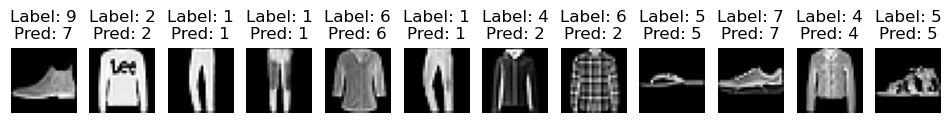

In [8]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = net(images)
_, predictions = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 12, figsize=(12, 4))
for i in range(12):
    axes[i].imshow(images[i][0], cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}\nPred: {predictions[i]}")
    axes[i].axis('off')
plt.show()